- PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('forestfiresAnn.csv')

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
df['size_category'] = le.fit_transform(df['size_category'])

In [6]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

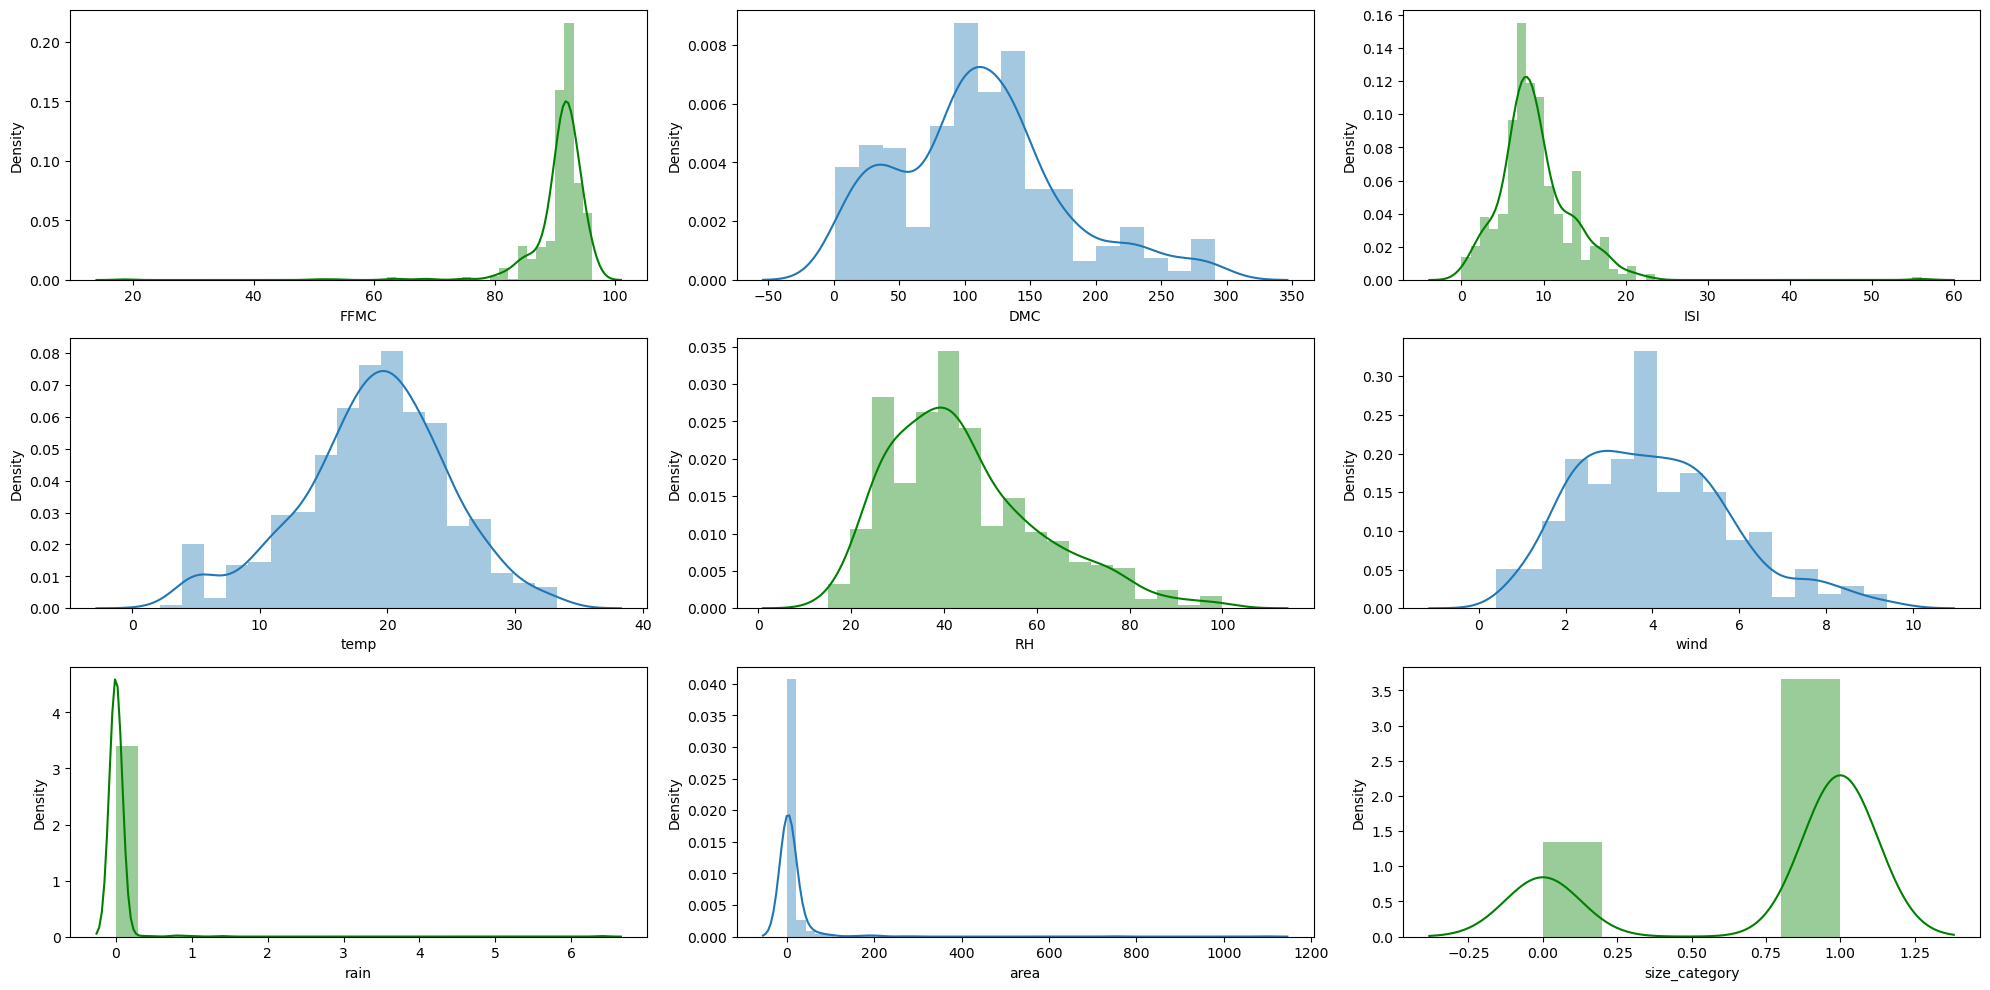

In [16]:
fig,ax=plt.subplots(3, 3, figsize=(20,10))

sns.distplot(df.FFMC,ax=ax[0,0],color='g')
sns.distplot(df.DMC,ax=ax[0,1])
sns.distplot(df.ISI,ax=ax[0,2],color='g')
sns.distplot(df.temp,ax=ax[1,0])
sns.distplot(df.RH,ax=ax[1,1],color='g')
sns.distplot(df.wind,ax=ax[1,2])
sns.distplot(df.rain,ax=ax[2,0],color='g')
sns.distplot(df.area,ax=ax[2,1])
sns.distplot(df.size_category,ax=ax[2,2],color='g')

plt.tight_layout()

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abc\anaconda3\lib\site-packa

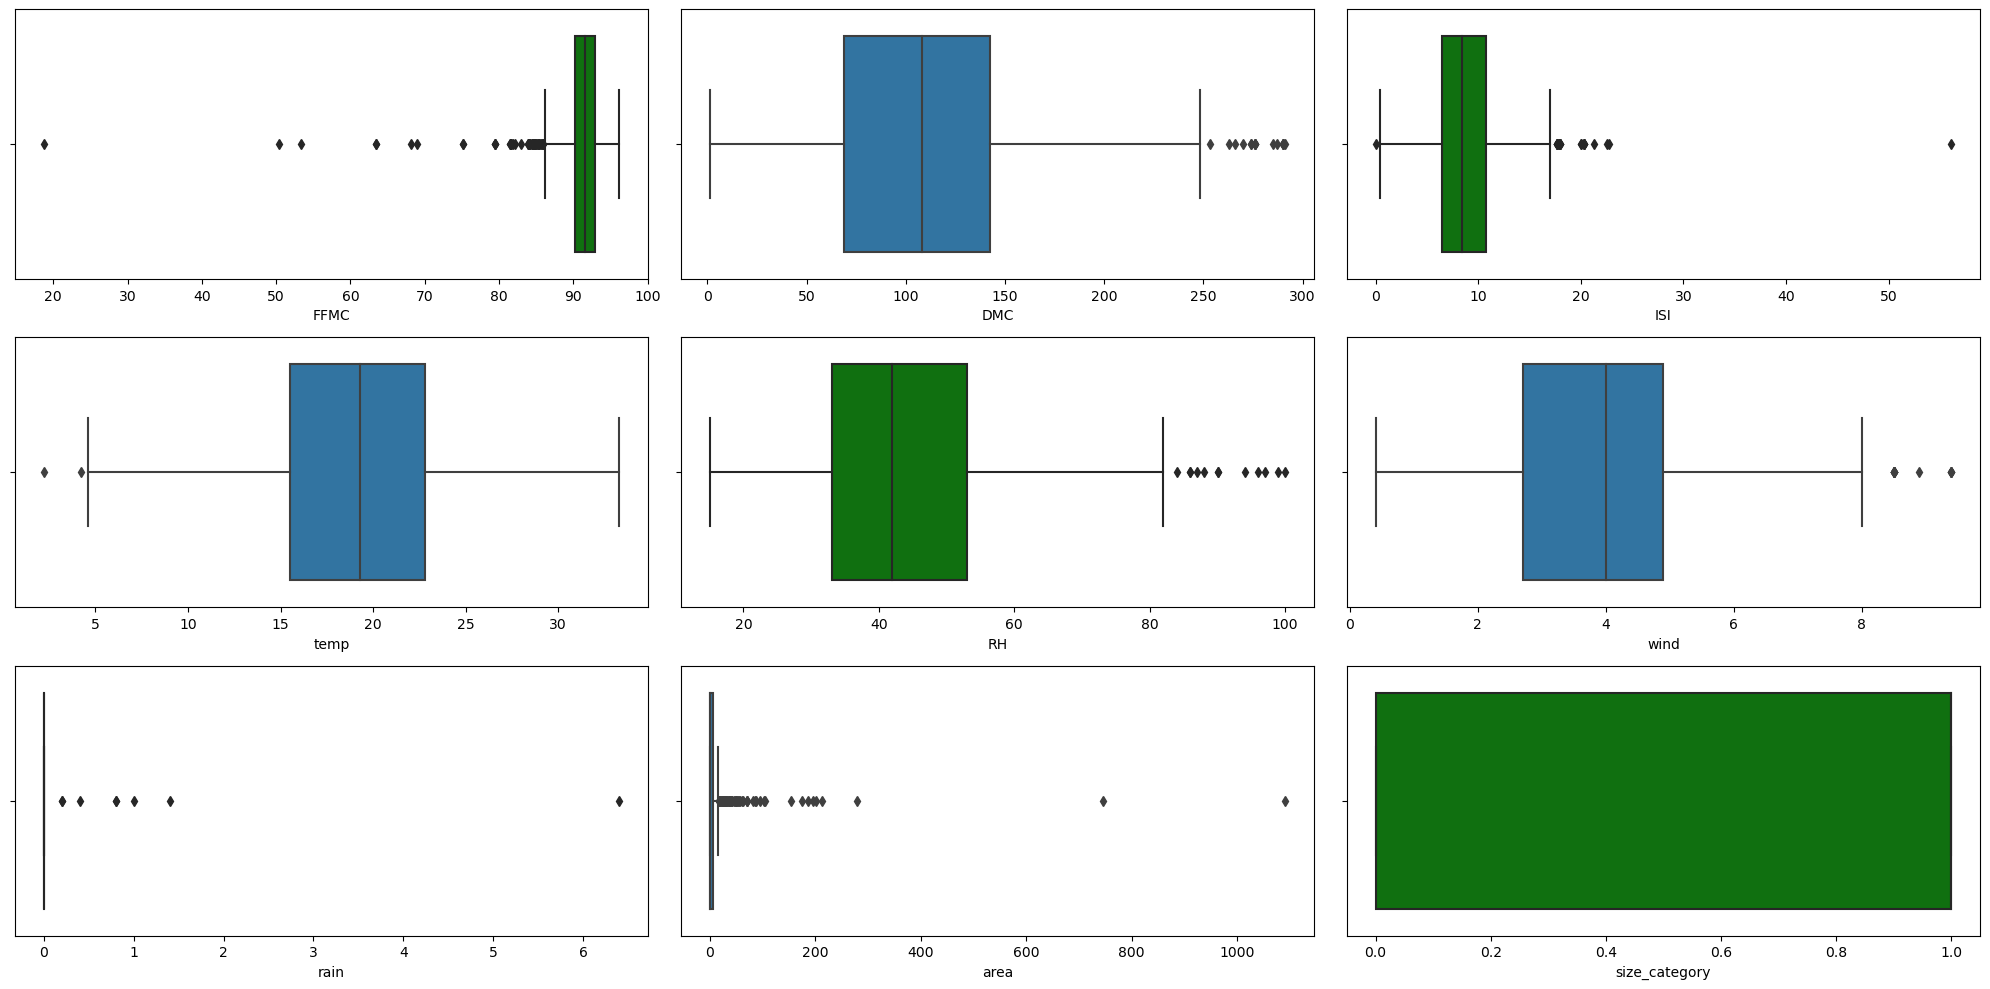

In [17]:
fig,ax=plt.subplots(3, 3, figsize=(20,10))

sns.boxplot(df.FFMC,ax=ax[0,0],color='g')
sns.boxplot(df.DMC,ax=ax[0,1])
sns.boxplot(df.ISI,ax=ax[0,2],color='g')
sns.boxplot(df.temp,ax=ax[1,0])
sns.boxplot(df.RH,ax=ax[1,1],color='g')
sns.boxplot(df.wind,ax=ax[1,2])
sns.boxplot(df.rain,ax=ax[2,0],color='g')
sns.boxplot(df.area,ax=ax[2,1])
sns.boxplot(df.size_category,ax=ax[2,2],color='g')

plt.tight_layout()

# Splitting Data into Training and Testing 

In [35]:
x = df.iloc[:,2:-1]
y = df['size_category']

In [36]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [39]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=10, activation='relu'))

#Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='binary_crossentropy')

#Fit the data 
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 32ms/step - loss: 0.8510 - val_loss: 0.8000
Epoch 2/150
13/13 [==============================] - 0s 7ms/step - loss: 0.8089 - val_loss: 0.7682
Epoch 3/150
13/13 [==============================] - 0s 7ms/step - loss: 0.7696 - val_loss: 0.7421
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.7378 - val_loss: 0.7187
Epoch 5/150
13/13 [==============================] - 0s 7ms/step - loss: 0.7095 - val_loss: 0.6995
Epoch 6/150
13/13 [==============================] - 0s 7ms/step - loss: 0.6861 - val_loss: 0.6837
Epoch 7/150
13/13 [==============================] - 0s 7ms/step - loss: 0.6644 - val_loss: 0.6719
Epoch 8/150
13/13 [==============================] - 0s 7ms/step - loss: 0.6466 - val_loss: 0.6618
Epoch 9/150
13/13 [==============================] - 0s 7ms/step - loss: 0.6317 - val_loss: 0.6532
Epoch 10/150
13/13 [==============================] - 0s 7ms/step - loss: 0.6187 - val_loss: 0.6469
Epoch 11

Epoch 83/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3677 - val_loss: 0.5894
Epoch 84/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3656 - val_loss: 0.5901
Epoch 85/150
13/13 [==============================] - 0s 6ms/step - loss: 0.3630 - val_loss: 0.5904
Epoch 86/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3607 - val_loss: 0.5903
Epoch 87/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3586 - val_loss: 0.5901
Epoch 88/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3560 - val_loss: 0.5899
Epoch 89/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3538 - val_loss: 0.5895
Epoch 90/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3517 - val_loss: 0.5901
Epoch 91/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3495 - val_loss: 0.5908
Epoch 92/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3472 - val_loss: 0.5911


<AxesSubplot:>

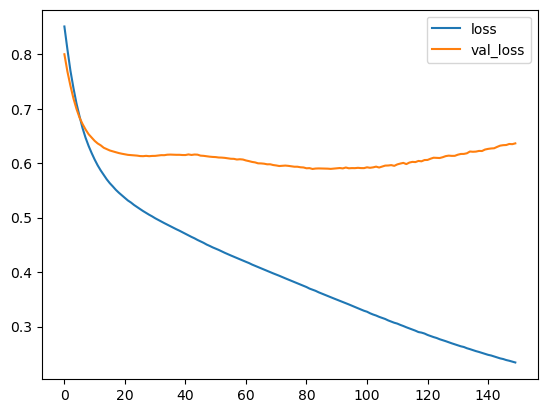

In [41]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [42]:
ypred = ann.predict(xtest)

4/4 [==============================] - 0s 7ms/step


In [45]:
ypred = ypred > 0.5

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        29
           1       0.83      0.97      0.90        75

    accuracy                           0.84       104
   macro avg       0.85      0.73      0.76       104
weighted avg       0.84      0.84      0.82       104



# Hyperparameter Tuning
- Early Stopping

In [49]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [51]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=250)

Epoch 1/250
13/13 [==============================] - 2s 24ms/step - loss: 0.6605 - val_loss: 0.6203
Epoch 2/250
13/13 [==============================] - 0s 8ms/step - loss: 0.6069 - val_loss: 0.6124
Epoch 3/250
13/13 [==============================] - 0s 8ms/step - loss: 0.5771 - val_loss: 0.6101
Epoch 4/250
13/13 [==============================] - 0s 8ms/step - loss: 0.5574 - val_loss: 0.6057
Epoch 5/250
13/13 [==============================] - 0s 8ms/step - loss: 0.5440 - val_loss: 0.6033
Epoch 6/250
13/13 [==============================] - 0s 6ms/step - loss: 0.5306 - val_loss: 0.6033
Epoch 7/250
13/13 [==============================] - 0s 8ms/step - loss: 0.5182 - val_loss: 0.5979
Epoch 8/250
13/13 [==============================] - 0s 6ms/step - loss: 0.5063 - val_loss: 0.5982
Epoch 9/250
13/13 [==============================] - 0s 10ms/step - loss: 0.4967 - val_loss: 0.5978
Epoch 10/250
13/13 [==============================] - 0s 10ms/step - loss: 0.4867 - val_loss: 0.5969
Epoch 

<AxesSubplot:>

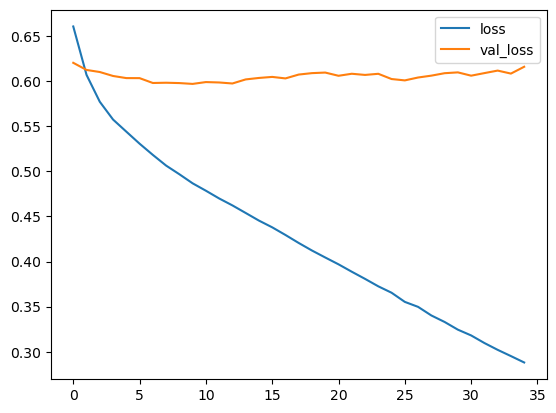

In [52]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

In [53]:
ypred1 = ann.predict(xtest)
ypred1 =  ypred1 > 0.5

4/4 [==============================] - 0s 6ms/step


In [54]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.83      0.34      0.49        29
           1       0.79      0.97      0.87        75

    accuracy                           0.80       104
   macro avg       0.81      0.66      0.68       104
weighted avg       0.80      0.80      0.77       104

